In [2]:
import pandas as pd
import spotipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [3]:
df = pd.read_csv('/Users/acthach/Desktop/Summer proj/spoty-records/output/final.csv', index_col = 0)
df.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
0,HOME PRAYER___k?d,2023-07-26 04:51,k?d,HOME PRAYER,220952,2023-07-26 04:51:00,0.666,0.723,2.0,-4.525,...,125.967,audio_features,3QB91wVPMrg8o3UBiO9C85,spotify:track:3QB91wVPMrg8o3UBiO9C85,https://api.spotify.com/v1/tracks/3QB91wVPMrg8...,https://api.spotify.com/v1/audio-analysis/3QB9...,220952.0,4.0,CAGE SCRIPT,233ci2Dl2HFr9PheUIWaUx
1,ex i never had___LANY,2023-07-26 04:54,LANY,ex i never had,201442,2023-07-26 04:54:00,0.650,0.388,10.0,-7.065,...,96.001,audio_features,1NAyq9TrQIpLHWStUX4xAQ,spotify:track:1NAyq9TrQIpLHWStUX4xAQ,https://api.spotify.com/v1/tracks/1NAyq9TrQIpL...,https://api.spotify.com/v1/audio-analysis/1NAy...,201442.0,4.0,gg bb xx,20tgAhlplT42WnAAC8Xndk
2,Walking The Wire___Imagine Dragons,2023-07-26 04:58,Imagine Dragons,Walking The Wire,232906,2023-07-26 04:58:00,0.540,0.763,4.0,-5.337,...,99.929,audio_features,1y3bE5i57eUm3hfLAc7h08,spotify:track:1y3bE5i57eUm3hfLAc7h08,https://api.spotify.com/v1/tracks/1y3bE5i57eUm...,https://api.spotify.com/v1/audio-analysis/1y3b...,232907.0,4.0,Evolve,33pt9HBdGlAbRGBHQgsZsU
3,This Ain't Love___Giveon,2023-07-26 05:01,Giveon,This Ain't Love,164967,2023-07-26 05:01:00,0.405,0.456,7.0,-9.900,...,81.752,audio_features,0Lvzyxvpd0NNf52Wp8zV0u,spotify:track:0Lvzyxvpd0NNf52Wp8zV0u,https://api.spotify.com/v1/tracks/0Lvzyxvpd0NN...,https://api.spotify.com/v1/audio-analysis/0Lvz...,164967.0,4.0,When It's All Said And Done... Take Time,1otOJAtgvO5VCBL4Gykrrd
4,Like Toy Soldiers___Eminem,2023-07-26 05:06,Eminem,Like Toy Soldiers,296880,2023-07-26 05:06:00,0.520,0.768,8.0,-3.489,...,79.178,audio_features,6CN3e26iQSj1N5lomh0mfO,spotify:track:6CN3e26iQSj1N5lomh0mfO,https://api.spotify.com/v1/tracks/6CN3e26iQSj1...,https://api.spotify.com/v1/audio-analysis/6CN3...,296880.0,4.0,Encore (Deluxe Version),1kTlYbs28MXw7hwO0NLYif


In [4]:
df.tail()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID
26917,alright (feat. The Kid LAROI)___EKKSTACY,2024-07-26 23:51,EKKSTACY,alright (feat. The Kid LAROI),129880,2024-07-26 23:51:00,0.492,0.720,1.0,-4.588,...,176.967,audio_features,1uQ5oCjZvQsMZaBFAdkSuF,spotify:track:1uQ5oCjZvQsMZaBFAdkSuF,https://api.spotify.com/v1/tracks/1uQ5oCjZvQsM...,https://api.spotify.com/v1/audio-analysis/1uQ5...,129880.0,4.0,EKKSTACY,5kBHoINYa2WwRaOK3vA7LC
26918,Echo___RSCL,2024-07-26 23:52,RSCL,Echo,27233,2024-07-26 23:52:00,0.702,0.878,1.0,-6.734,...,124.996,audio_features,32fmwlkq7srmOAb5N0vdyj,spotify:track:32fmwlkq7srmOAb5N0vdyj,https://api.spotify.com/v1/tracks/32fmwlkq7srm...,https://api.spotify.com/v1/audio-analysis/32fm...,134400.0,3.0,Echo,3oVQAqfrzIg4S5pF74au4x
26919,what we had was real___Rommii,2024-07-26 23:54,Rommii,what we had was real,136062,2024-07-26 23:54:00,0.755,0.764,10.0,-7.423,...,127.041,audio_features,7lPVC3ppoIixU2PH2KcvTK,spotify:track:7lPVC3ppoIixU2PH2KcvTK,https://api.spotify.com/v1/tracks/7lPVC3ppoIix...,https://api.spotify.com/v1/audio-analysis/7lPV...,136063.0,4.0,what we had was real,0mAxfupLpuSvfiHeaerkBV
26920,Beautiful Liar___Kansy,2024-07-26 23:57,Kansy,Beautiful Liar,152380,2024-07-26 23:57:00,0.716,0.430,11.0,-17.270,...,125.990,audio_features,3mbEbsX7GBMTM5dqbB6hFj,spotify:track:3mbEbsX7GBMTM5dqbB6hFj,https://api.spotify.com/v1/tracks/3mbEbsX7GBMT...,https://api.spotify.com/v1/audio-analysis/3mbE...,152381.0,4.0,Beautiful Liar,6Zz8PX9fSDHLnh311DDvbd
26921,"Better Off (Alone, Pt. III)___Alan Walker",2024-07-26 23:59,Alan Walker,"Better Off (Alone, Pt. III)",151702,2024-07-26 23:59:00,0.510,0.691,9.0,-5.199,...,129.852,audio_features,1P7hMSbpJOQy58eC78qx7s,spotify:track:1P7hMSbpJOQy58eC78qx7s,https://api.spotify.com/v1/tracks/1P7hMSbpJOQy...,https://api.spotify.com/v1/audio-analysis/1P7h...,151703.0,4.0,"Better Off (Alone, Pt. III)",1eQk5l0bTQPg2w8knqu6NS


In [6]:
df.shape

(26922, 26)

In [7]:
df.columns

Index(['name', 'endTime', 'artistName', 'trackName', 'msPlayed', 'datetime',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'albumName', 'albumID'],
      dtype='object')

In [8]:
df[['msPlayed', 'duration_ms']] 

,msPlayed,duration_ms
0,220952,220952.0
1,201442,201442.0
2,232906,232907.0
3,164967,164967.0
4,296880,296880.0
...,...,...
26917,129880,129880.0
26918,27233,134400.0
26919,136062,136063.0
26920,152380,152381.0


In [9]:
df.isnull().any()

name                False
endTime             False
artistName          False
trackName           False
msPlayed            False
datetime            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
albumName           False
albumID             False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26922 entries, 0 to 26921
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              26922 non-null  object 
 1   endTime           26922 non-null  object 
 2   artistName        26922 non-null  object 
 3   trackName         26922 non-null  object 
 4   msPlayed          26922 non-null  int64  
 5   datetime          26922 non-null  object 
 6   danceability      26922 non-null  float64
 7   energy            26922 non-null  float64
 8   key               26922 non-null  float64
 9   loudness          26922 non-null  float64
 10  mode              26922 non-null  float64
 11  speechiness       26922 non-null  float64
 12  acousticness      26922 non-null  float64
 13  instrumentalness  26922 non-null  float64
 14  liveness          26922 non-null  float64
 15  valence           26922 non-null  float64
 16  tempo             26922 non-null  float64
 17

In [11]:
df['endTime'] = pd.to_datetime(df['endTime'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df[df.duplicated()]

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,albumName,albumID


In [13]:
# Create new columns with song name & artist
df['name'] = df['name'].str.replace('___',' by ')

In [14]:
df['minutesPlayed'] = df['msPlayed'] / 60000

In [15]:
df['totalMinutes'] = df['duration_ms'] / 60000

In [16]:
# Create column with only day, time, hour, year
df['date'] = [d.date() for d in df['endTime']]
df['time'] = [d.time() for d in df['endTime']]
df['day'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['month'] = df['endTime'].dt.month_name()
df['year'] = df['endTime'].dt.year
df['dayName'] = df['endTime'].dt.day_name()

In [17]:
xy = df.copy()

In [18]:
xy.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,date,time,day,hour,month,year,dayName
0,HOME PRAYER by k?d,2023-07-26 04:51:00,k?d,HOME PRAYER,220952,2023-07-26 04:51:00,0.666,0.723,2.0,-4.525,...,233ci2Dl2HFr9PheUIWaUx,3.682533,3.682533,2023-07-26,04:51:00,26,4,July,2023,Wednesday
1,ex i never had by LANY,2023-07-26 04:54:00,LANY,ex i never had,201442,2023-07-26 04:54:00,0.650,0.388,10.0,-7.065,...,20tgAhlplT42WnAAC8Xndk,3.357367,3.357367,2023-07-26,04:54:00,26,4,July,2023,Wednesday
2,Walking The Wire by Imagine Dragons,2023-07-26 04:58:00,Imagine Dragons,Walking The Wire,232906,2023-07-26 04:58:00,0.540,0.763,4.0,-5.337,...,33pt9HBdGlAbRGBHQgsZsU,3.881767,3.881783,2023-07-26,04:58:00,26,4,July,2023,Wednesday
3,This Ain't Love by Giveon,2023-07-26 05:01:00,Giveon,This Ain't Love,164967,2023-07-26 05:01:00,0.405,0.456,7.0,-9.900,...,1otOJAtgvO5VCBL4Gykrrd,2.749450,2.749450,2023-07-26,05:01:00,26,5,July,2023,Wednesday
4,Like Toy Soldiers by Eminem,2023-07-26 05:06:00,Eminem,Like Toy Soldiers,296880,2023-07-26 05:06:00,0.520,0.768,8.0,-3.489,...,1kTlYbs28MXw7hwO0NLYif,4.948000,4.948000,2023-07-26,05:06:00,26,5,July,2023,Wednesday


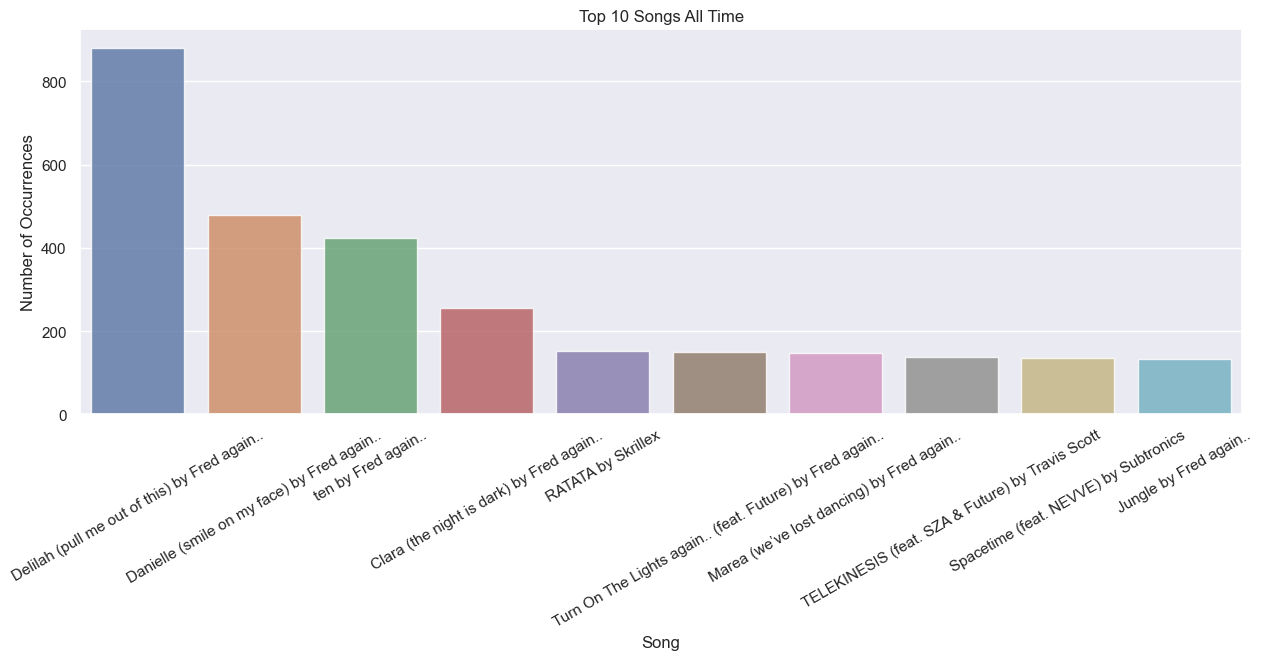

In [21]:
song_count = df['name'].value_counts()
song_count = song_count[:10]

plt.figure(figsize=(15,5))
chart = sns.barplot(x=song_count.index, y=song_count.values, alpha=0.8)
plt.title('Top 10 Songs All Time')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Song', fontsize=12)
chart.set_xticklabels(song_count.index, rotation=30)
plt.show()

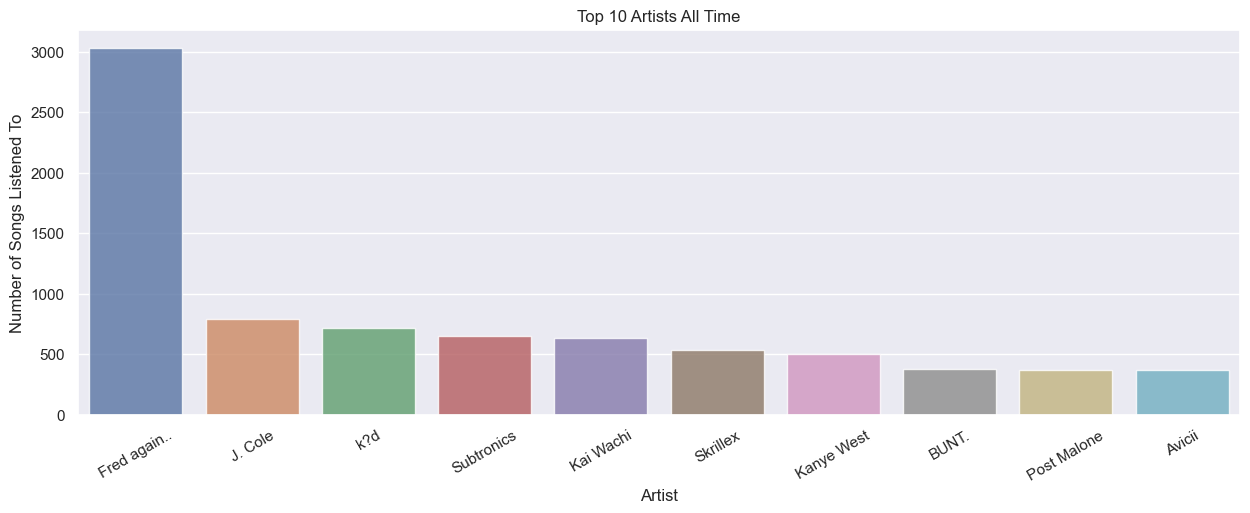

In [22]:
song_count = df['artistName'].value_counts()
song_count = song_count[:10]
plt.figure(figsize=(15,5))
chart = sns.barplot(x=song_count.index, y=song_count.values, alpha=0.8)
plt.title('Top 10 Artists All Time')
plt.ylabel('Number of Songs Listened To', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(song_count.index, rotation=30)

plt.show()

In [23]:
amount_of_time = df.groupby(by='artistName')['minutesPlayed'].sum().sort_values(ascending=False)[:15]

amount_of_time

artistName
Fred again..      9837.361983
J. Cole           1751.243800
k?d               1583.851367
Kai Wachi         1513.991833
Subtronics        1486.758467
Skrillex          1218.160433
Kanye West         969.788900
Travis Scott       839.912817
Avicii             797.629483
Kendrick Lamar     795.358750
SZA                788.310600
PEEKABOO           762.463400
BUNT.              709.430050
GRiZ               644.580283
The Kid LAROI      623.717700
Name: minutesPlayed, dtype: float64

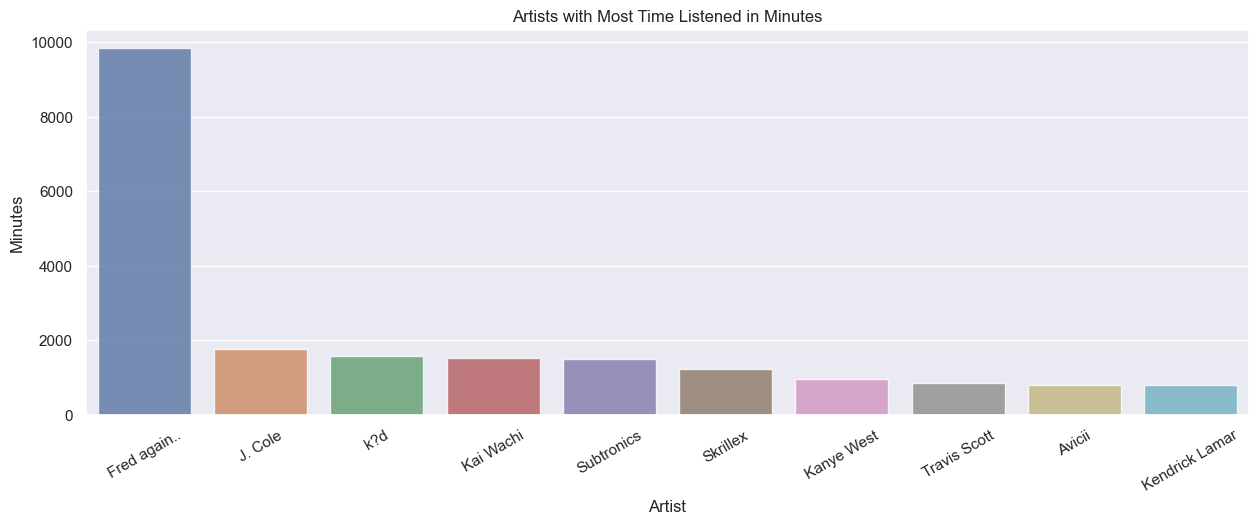

In [25]:
# What artists have the most time listened to?
b = df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(x=b['artistName'], y=b['minutesPlayed'], alpha=0.8)
plt.title('Artists with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Artist', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(b['artistName'], rotation=30)

plt.show()

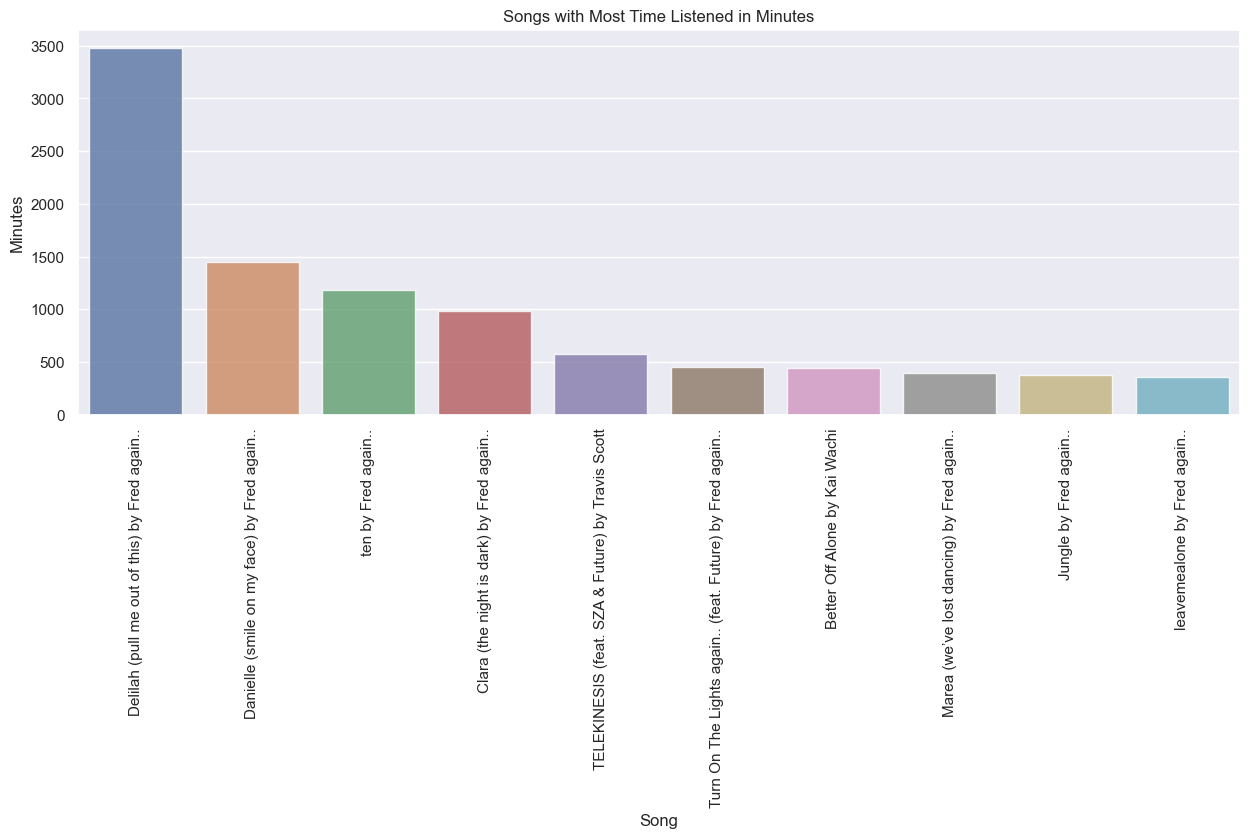

In [27]:
# What songs have the most minutes spent listening to?
c = df.groupby('name')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(x=c['name'], y=c['minutesPlayed'], alpha=0.8)
plt.title('Songs with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Song', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(c['name'], rotation=90)

plt.show()

/Users/acthach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/acthach/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


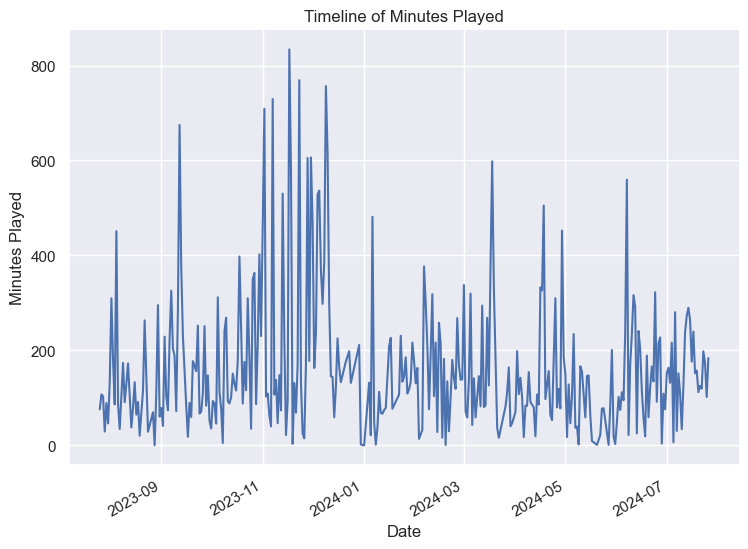

In [28]:
# How has the amount of music listened to per day changed over time?
d = df.groupby('date')['minutesPlayed'].sum().reset_index()
chart = sns.relplot(x='date', y='minutesPlayed', kind="line", data=d).set(title='Timeline of Minutes Played')
chart.fig.autofmt_xdate()
chart.fig.set_figwidth(8.27)
chart.fig.set_figheight(5.7)
chart.set(xlabel='Date', ylabel='Minutes Played')

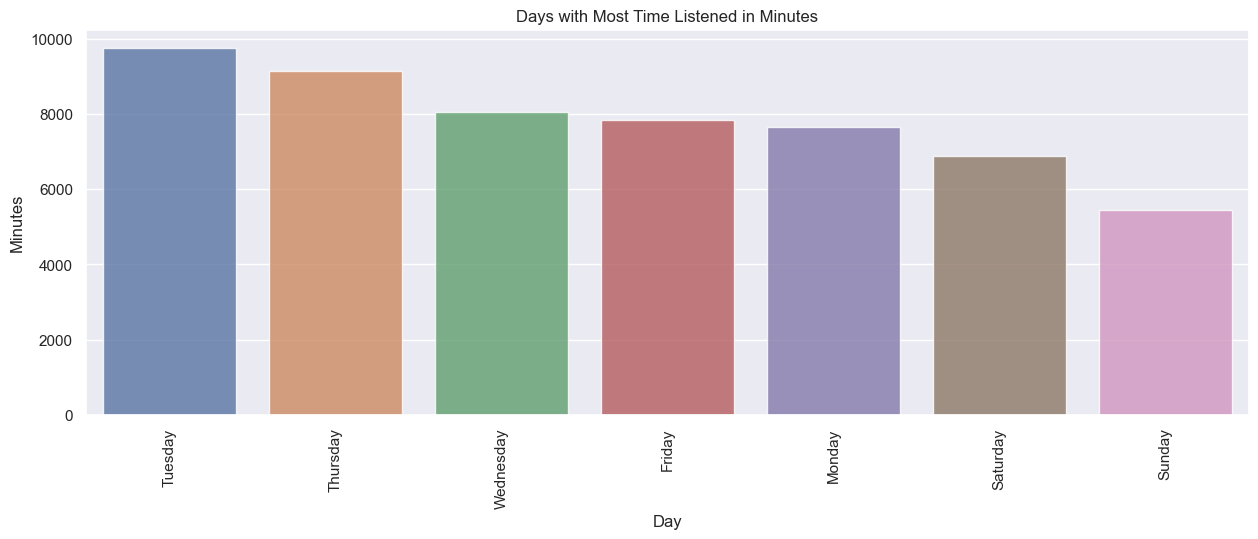

In [30]:
e = df.groupby('dayName')['minutesPlayed'].sum().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(x=e['dayName'],y= e['minutesPlayed'], alpha=0.8)
plt.title('Days with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Day', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['dayName'], rotation=90)

plt.show()

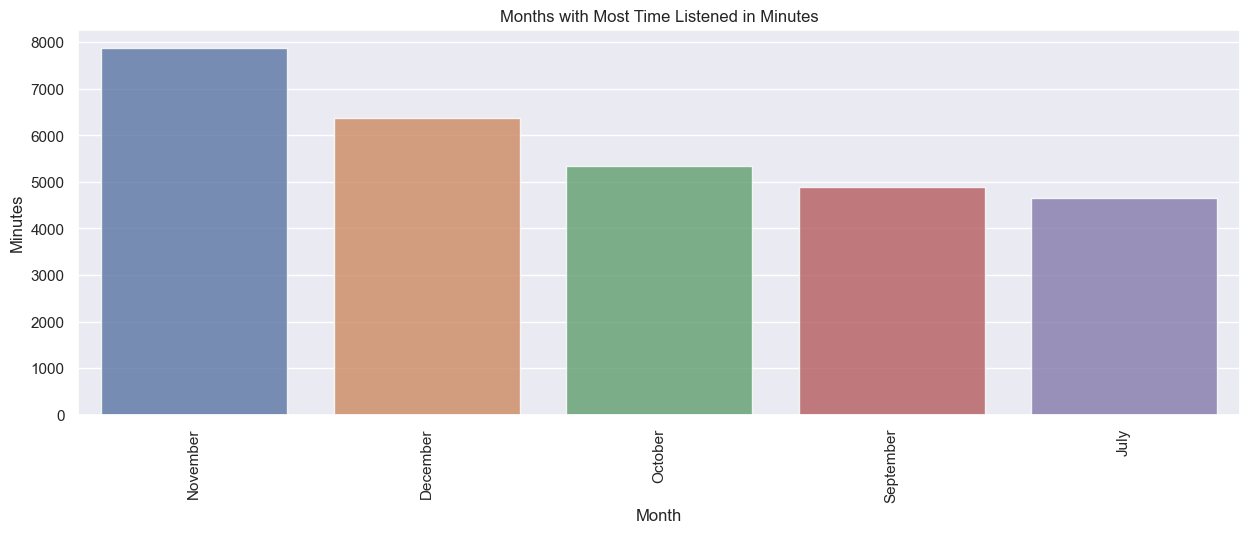

In [32]:
e = df.groupby('month')['minutesPlayed'].sum().sort_values(ascending=False)[:5].reset_index()
plt.figure(figsize=(15,5))
chart = sns.barplot(x=e['month'],y= e['minutesPlayed'], alpha=0.8)
plt.title('Months with Most Time Listened in Minutes')
plt.ylabel('Minutes', fontsize=12)
plt.xlabel('Month', fontsize=12)
xticks=chart.xaxis.get_major_ticks()
chart.set_xticklabels(e['month'], rotation=90)

plt.show()

Understanding the features of each song

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB).

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [33]:
df = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','endTime', 'day', 'hour', 'month', 'year', 'dayName']]
af = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
df.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,endTime,day,hour,month,year,dayName
0,0.666,0.723,2.0,-4.525,0.1160,0.0132,0.076200,0.3510,0.282,125.967,2023-07-26 04:51:00,26,4,July,2023,Wednesday
1,0.650,0.388,10.0,-7.065,0.0332,0.3060,0.000000,0.1140,0.628,96.001,2023-07-26 04:54:00,26,4,July,2023,Wednesday
2,0.540,0.763,4.0,-5.337,0.0373,0.0161,0.000000,0.0941,0.151,99.929,2023-07-26 04:58:00,26,4,July,2023,Wednesday
3,0.405,0.456,7.0,-9.900,0.0939,0.4510,0.000017,0.6290,0.433,81.752,2023-07-26 05:01:00,26,5,July,2023,Wednesday
4,0.520,0.768,8.0,-3.489,0.3590,0.0193,0.000340,0.1040,0.398,79.178,2023-07-26 05:06:00,26,5,July,2023,Wednesday


[Text(0.5, 1.0, 'Coorelations Between Song Features')]

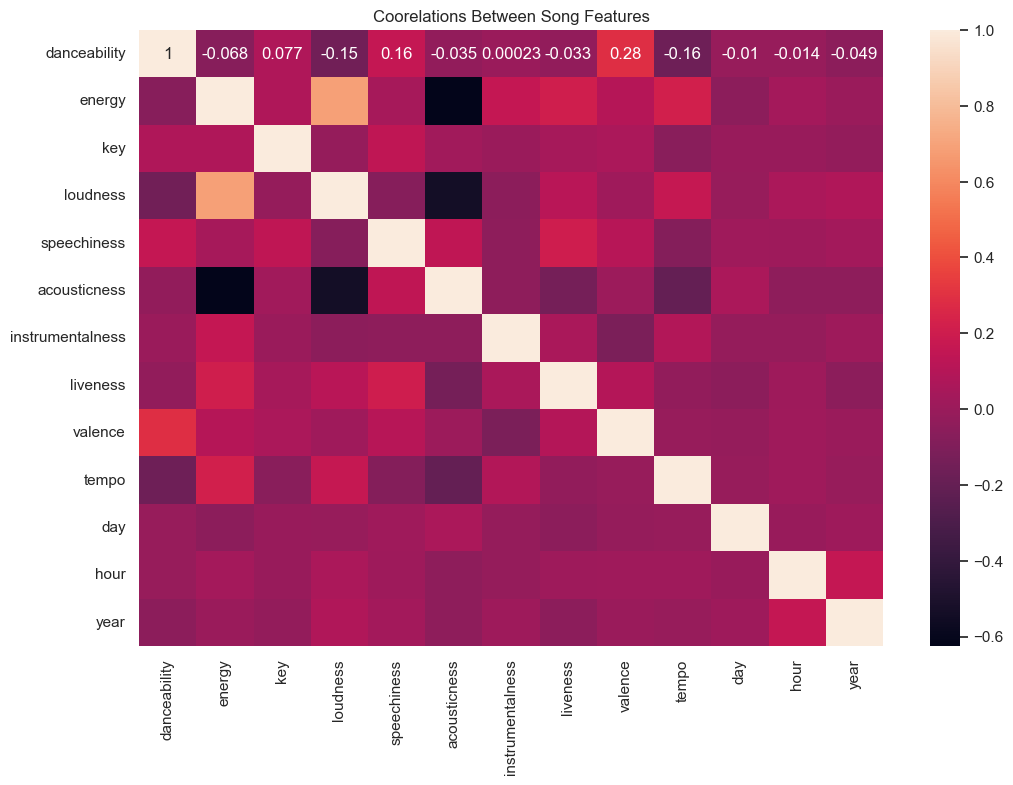

In [36]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True).set(title='Coorelations Between Song Features')

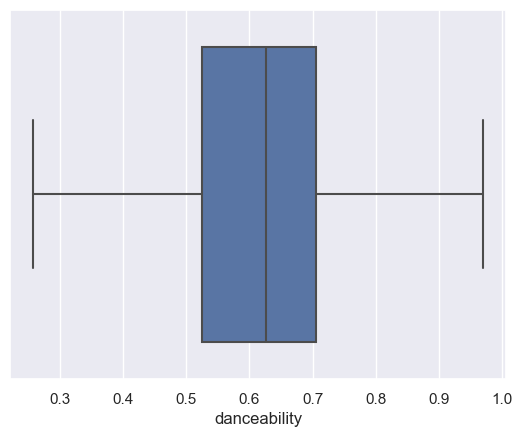

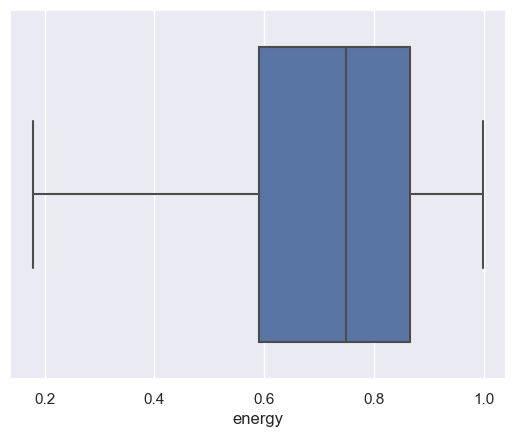

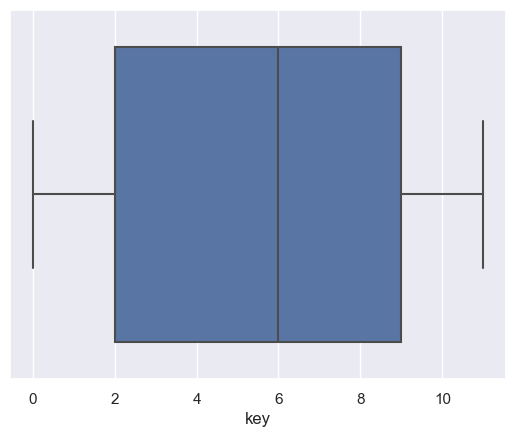

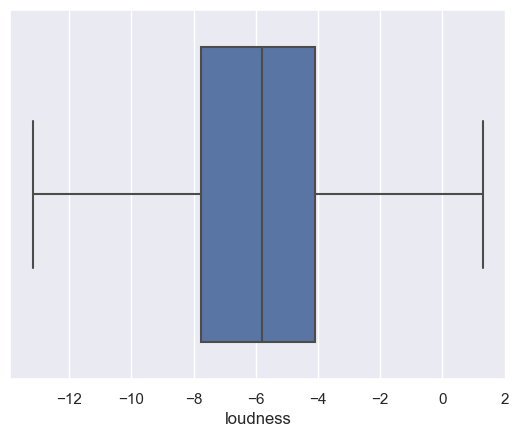

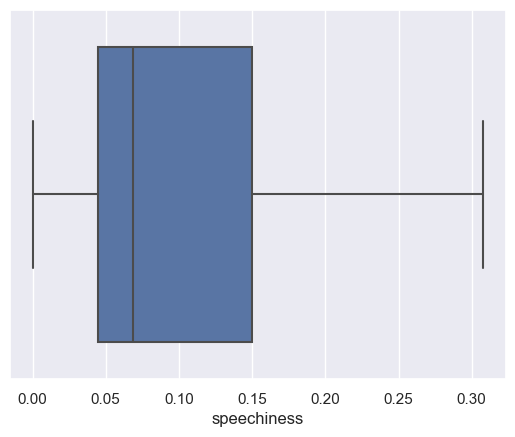

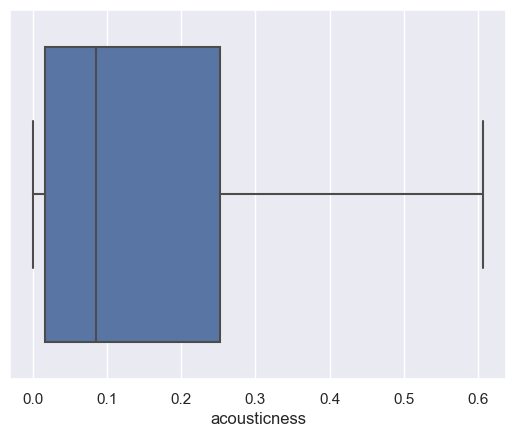

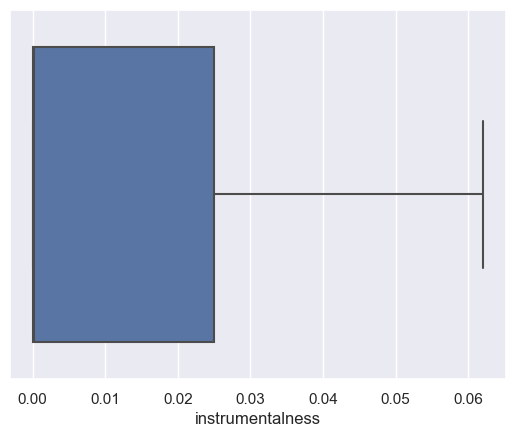

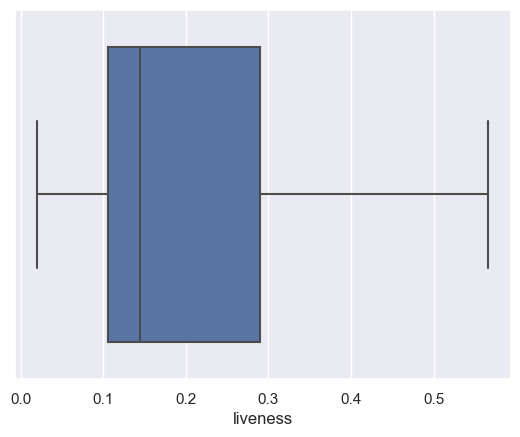

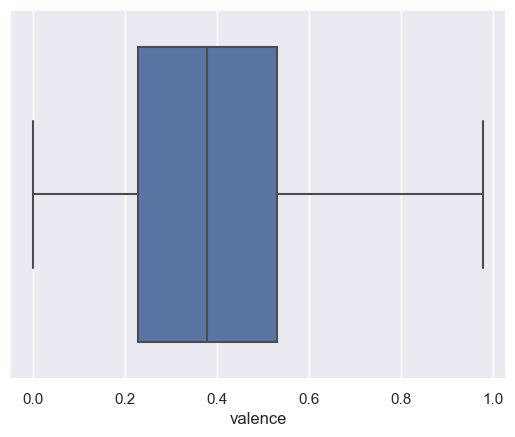

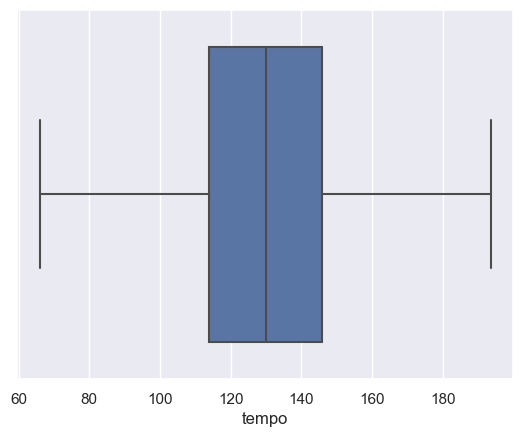

In [37]:
for feature in af:
    sns.boxplot(showfliers = False, x=df[feature])
    plt.show()

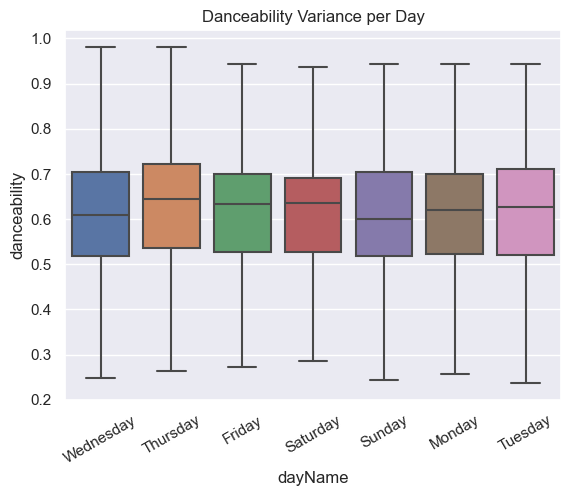

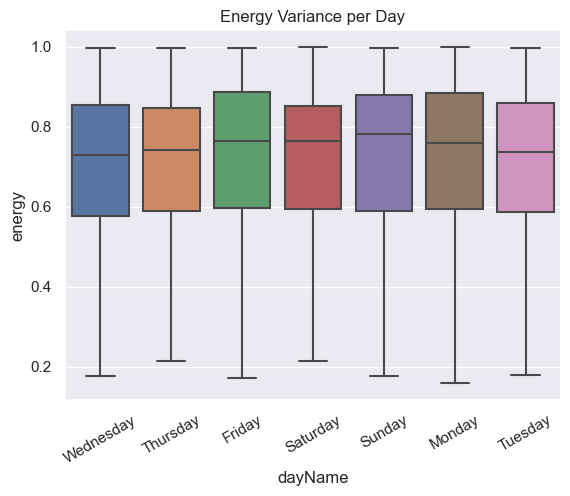

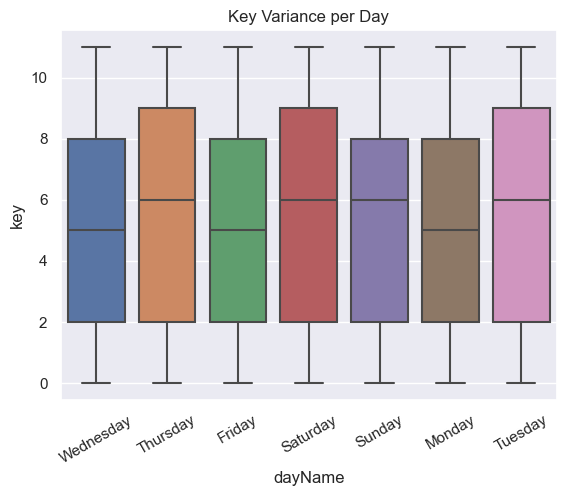

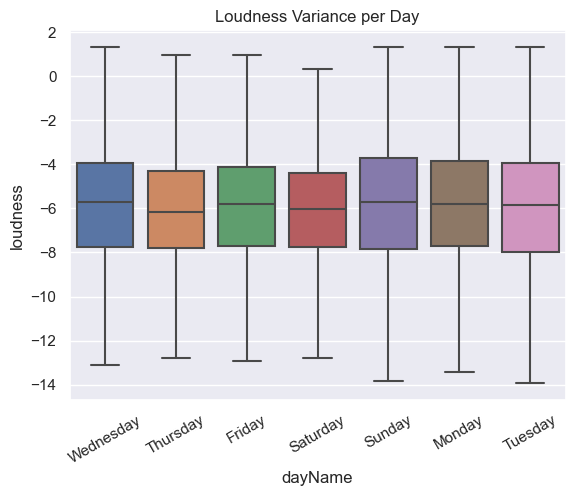

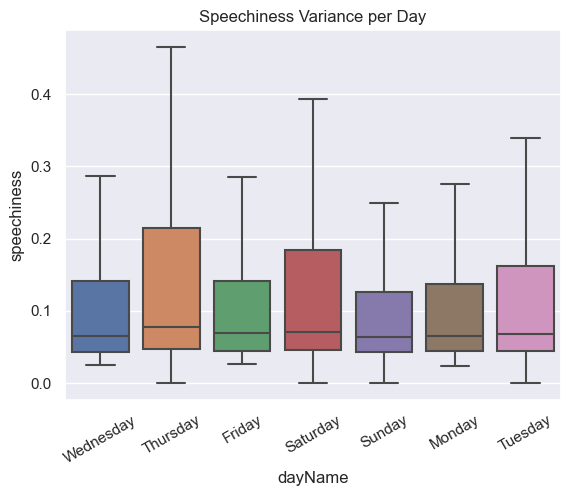

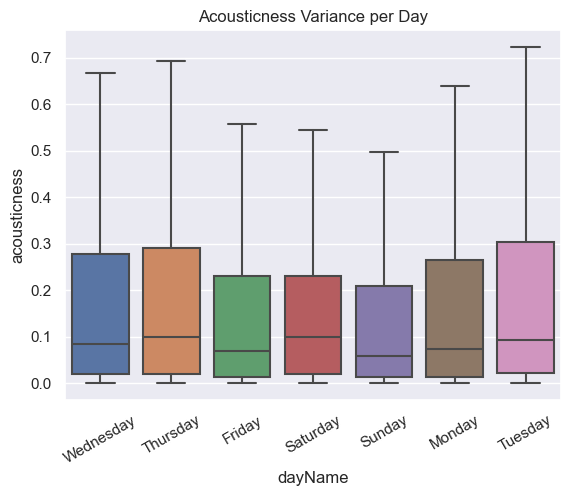

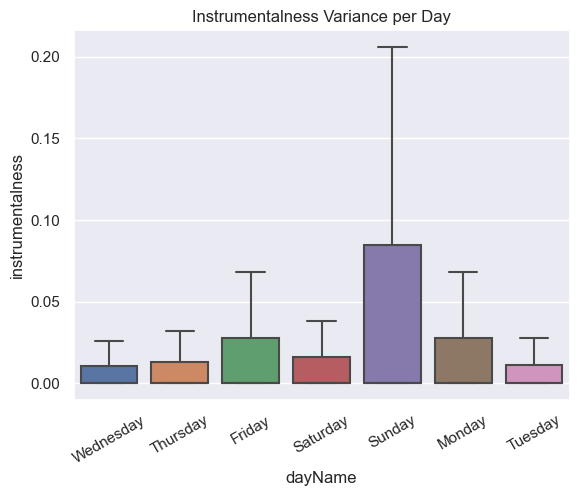

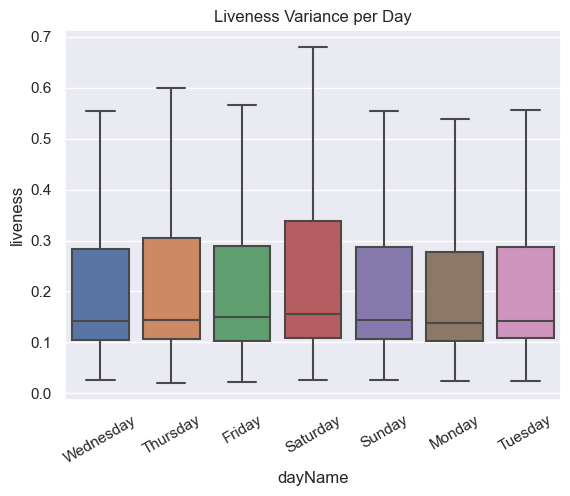

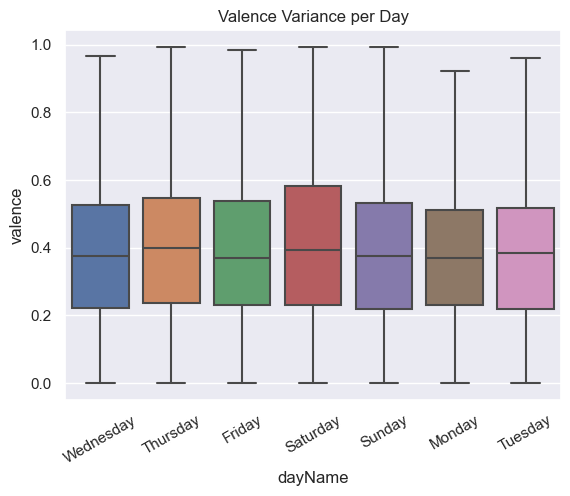

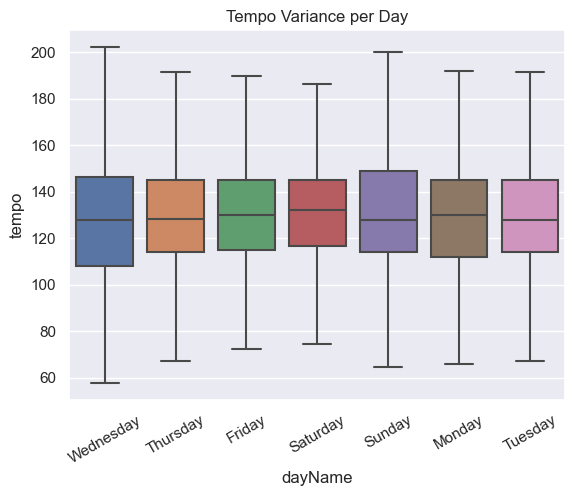

In [38]:
for feature in af:
    ax = sns.boxplot(x="dayName", y=feature, data=df, showfliers = False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(feature.title() + ' Variance per Day')
    plt.show()

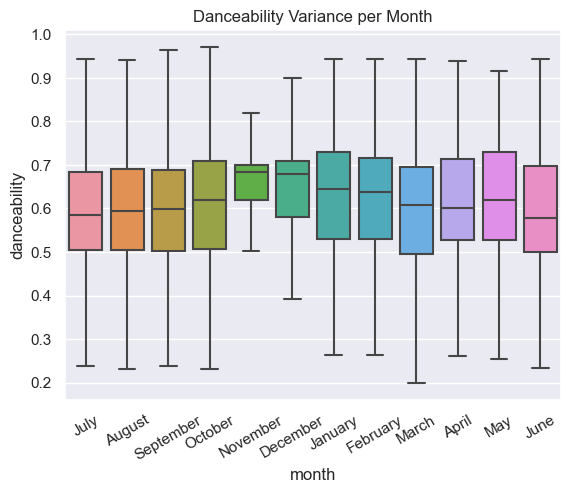

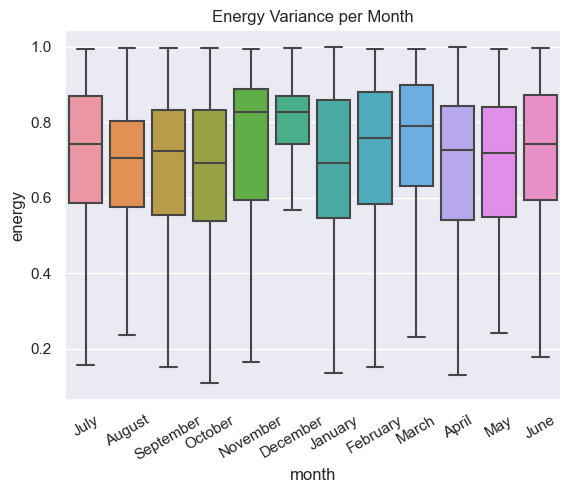

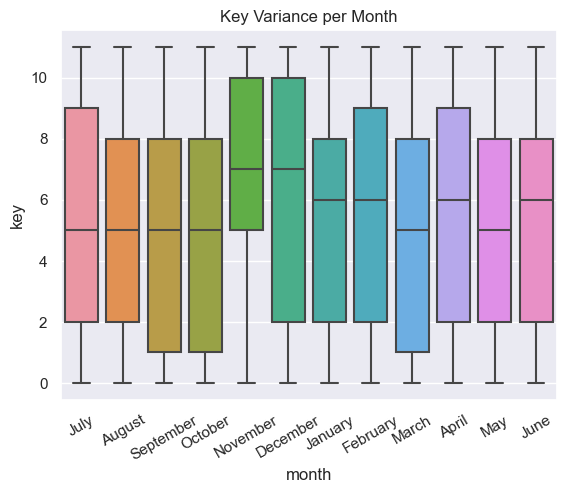

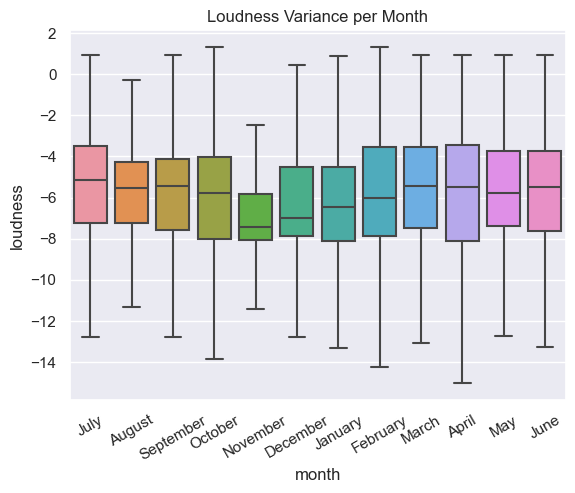

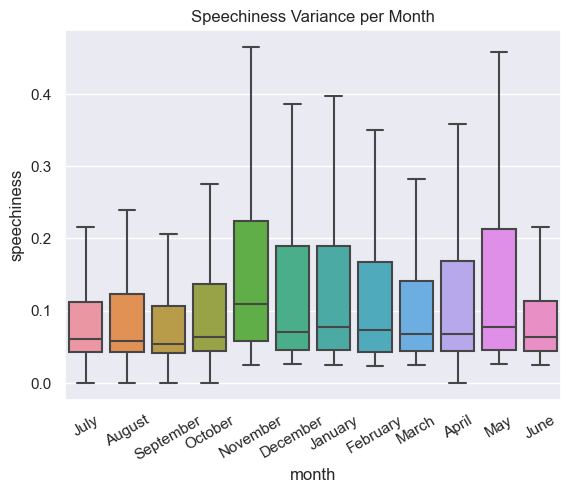

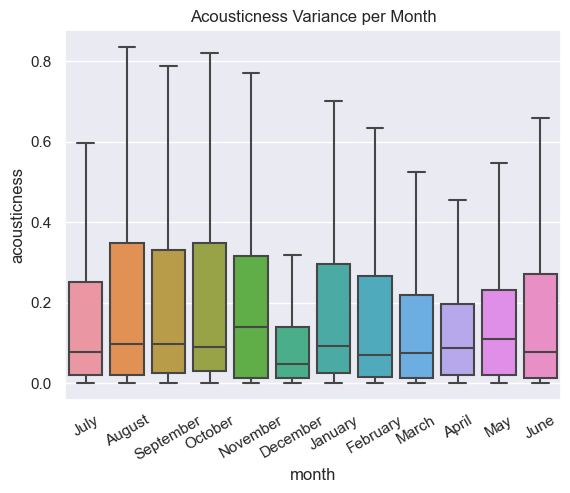

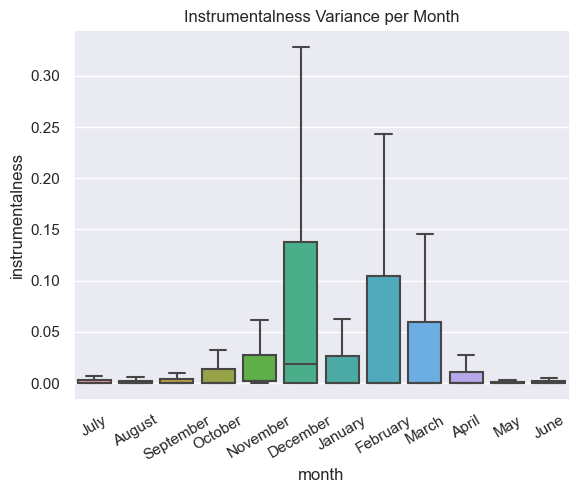

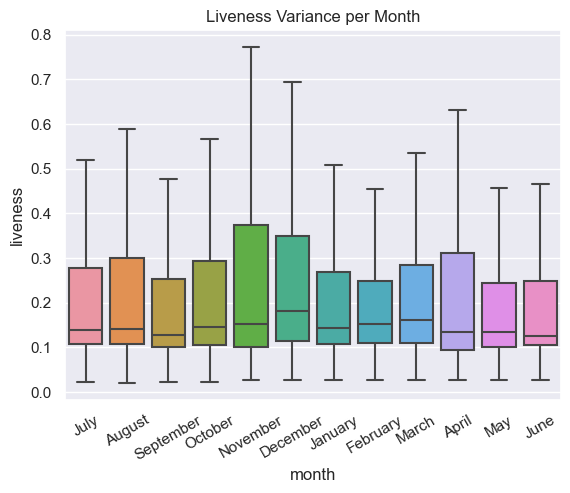

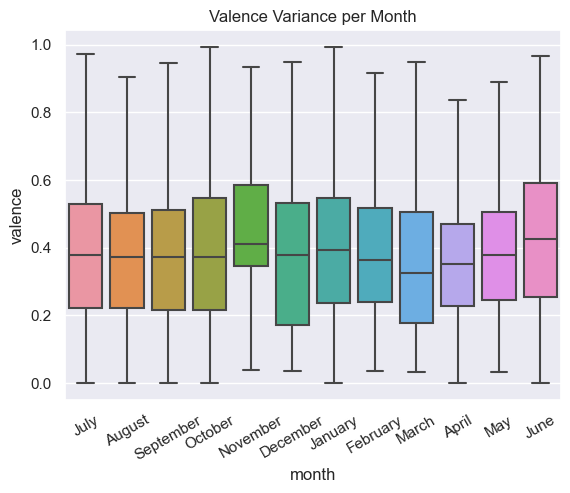

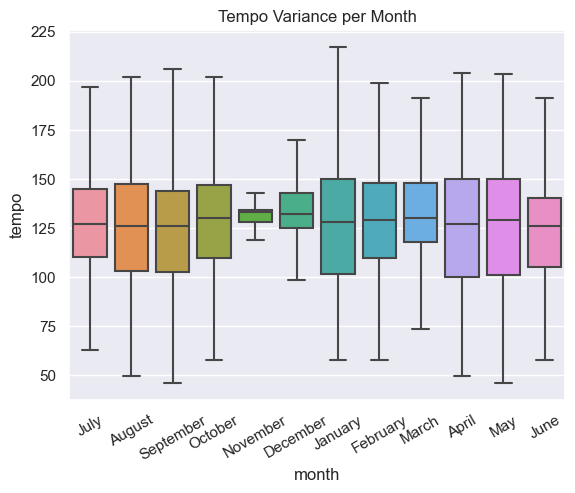

In [39]:
for feature in af:
    ax = sns.boxplot(x="month", y=feature, data=df, showfliers = False)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.title(feature.title() + ' Variance per Month')
    plt.show()

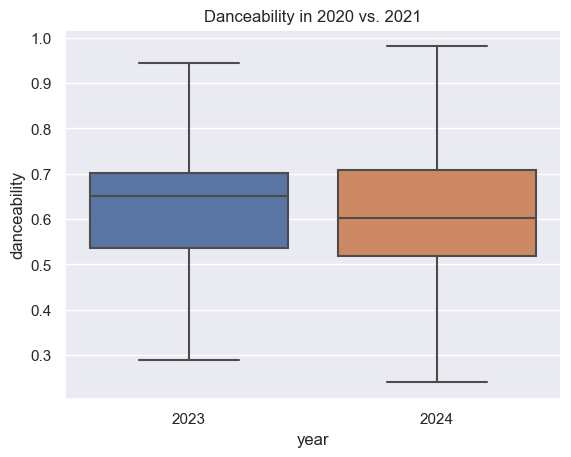

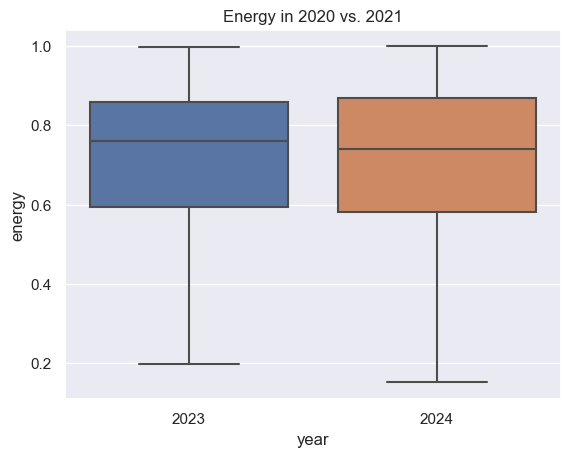

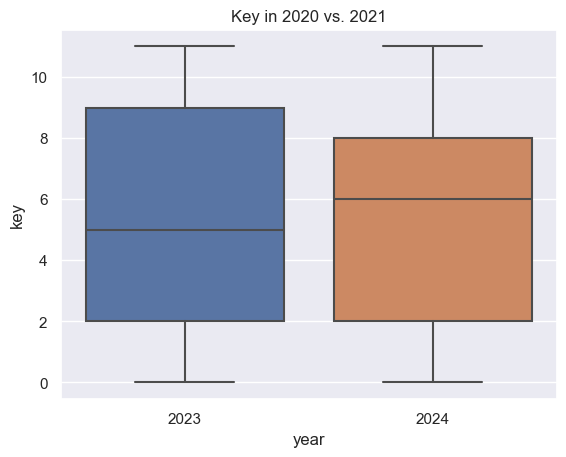

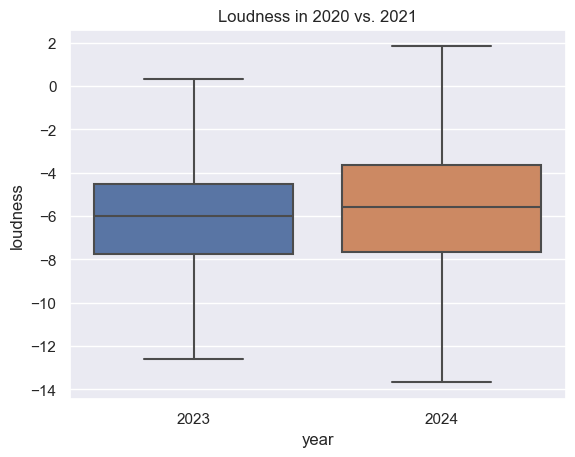

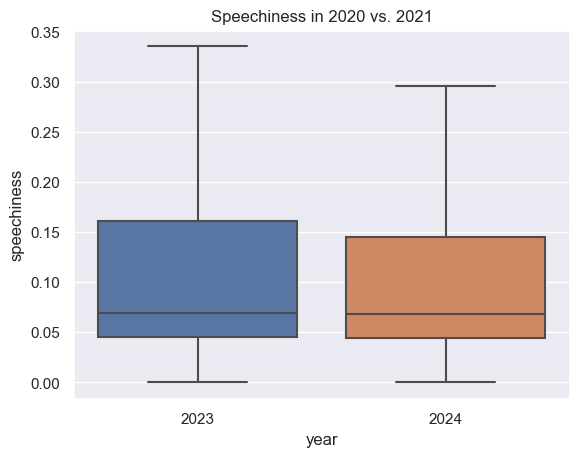

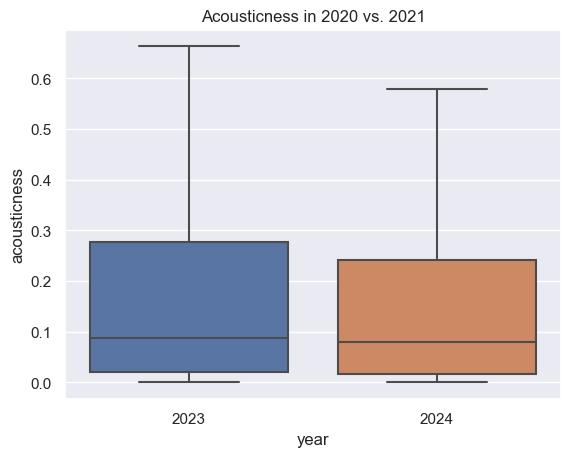

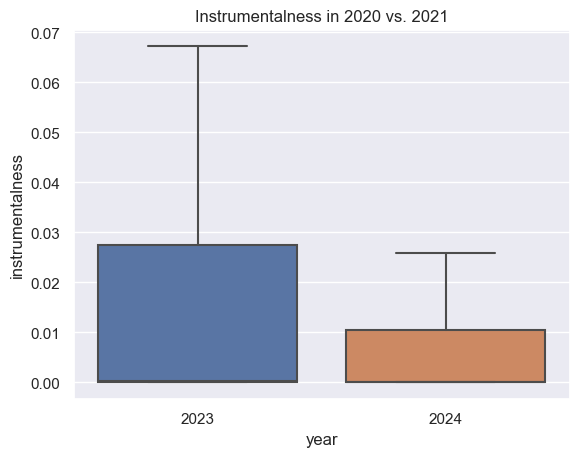

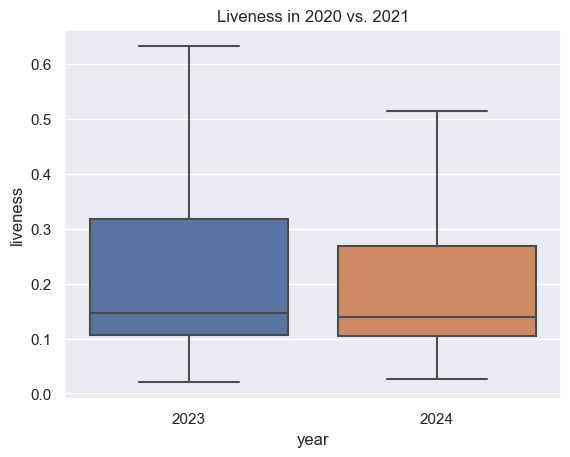

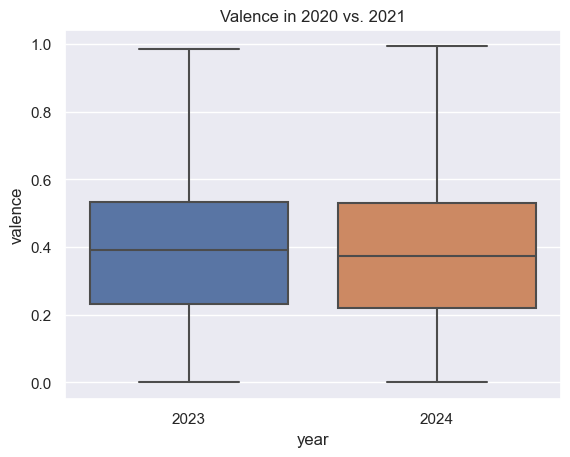

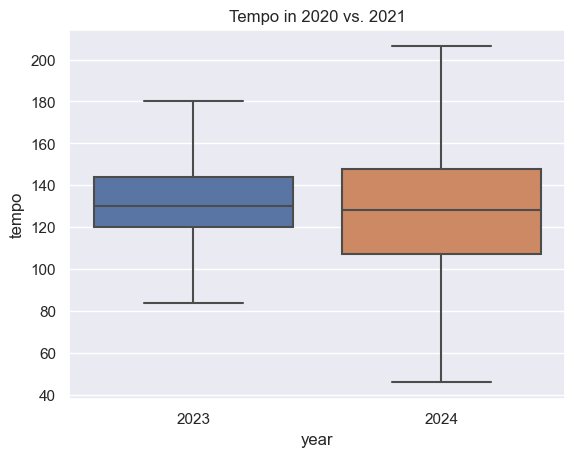

In [40]:
# What is the variance of each feature per year? (Hidden output)
for feature in af:
    ax = sns.boxplot(x="year", y=feature, data=df, showfliers = False)
    plt.title(feature.title() + ' in 2020 vs. 2021')
    plt.show()

In [41]:
# Creating a new dataframe with audio features of top 100 songs
song_count = xy['name'].value_counts()[:100]
xy = xy.loc[xy['name'].isin(song_count.index)].drop_duplicates(subset=['name'])
xy.head()

,name,endTime,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,...,albumID,minutesPlayed,totalMinutes,date,time,day,hour,month,year,dayName
51,Griztronics by GRiZ,2023-07-27 20:47:00,GRiZ,Griztronics,146645,2023-07-27 20:47:00,0.518,0.913,0.0,-1.023,...,0XDUYwgZnjw3SdlxsVXl5S,2.444083,2.427583,2023-07-27,20:47:00,27,20,July,2023,Thursday
57,Flashing Lights by Kanye West,2023-07-27 21:12:00,Kanye West,Flashing Lights,4382,2023-07-27 21:12:00,0.639,0.628,6.0,-7.578,...,4SZko61aMnmgvNhfhgTuD3,0.073033,3.958450,2023-07-27,21:12:00,27,21,July,2023,Thursday
66,Mourning by Post Malone,2023-07-27 21:18:00,Post Malone,Mourning,147819,2023-07-27 21:18:00,0.598,0.655,9.0,-4.568,...,5mr7Zd2DiuChyMNQ5x76HX,2.463650,2.463650,2023-07-27,21:18:00,27,21,July,2023,Thursday
149,Other Side by ILLENIUM,2023-07-28 04:20:00,ILLENIUM,Other Side,6582,2023-07-28 04:20:00,0.537,0.753,1.0,-3.351,...,0ValflNlWce21wm5PlwV60,0.109700,3.526550,2023-07-28,04:20:00,28,4,July,2023,Friday
180,When I'm Gone - NGHTMRE Remix by PEEKABOO,2023-07-28 06:21:00,PEEKABOO,When I'm Gone - NGHTMRE Remix,220561,2023-07-28 06:21:00,0.564,0.668,6.0,-4.686,...,7izHE9ywehTSlhRcTZKopg,3.676017,3.706667,2023-07-28,06:21:00,28,6,July,2023,Friday


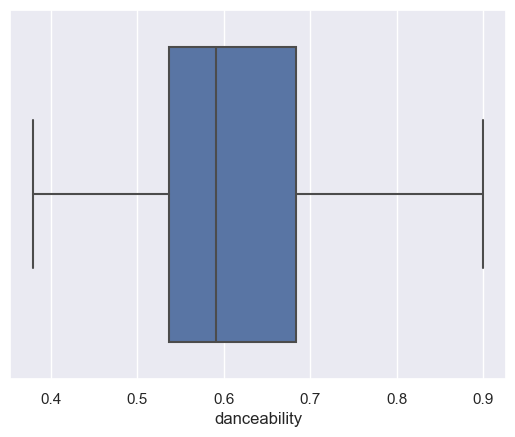

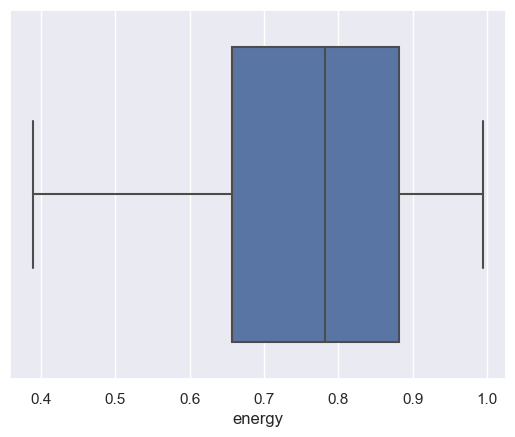

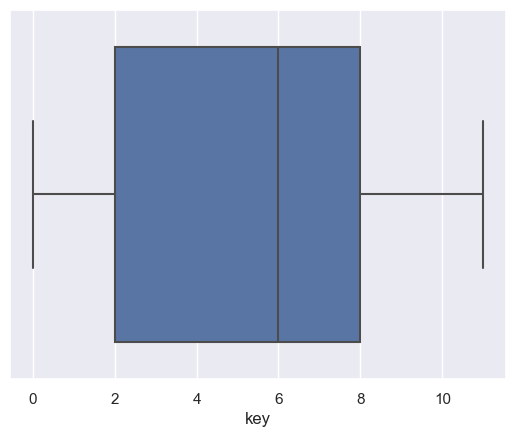

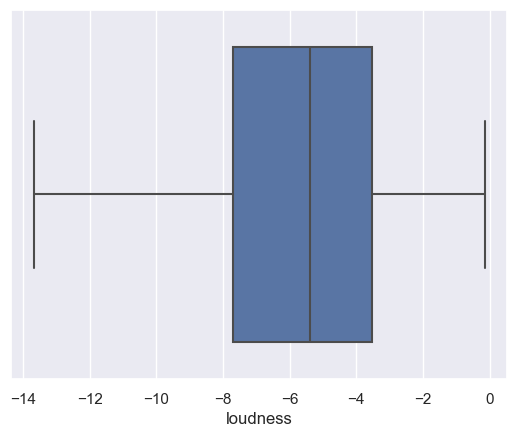

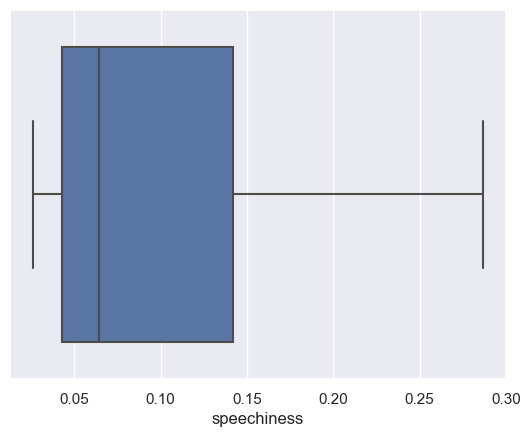

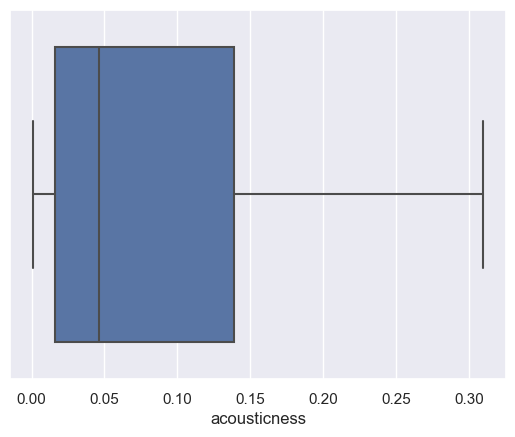

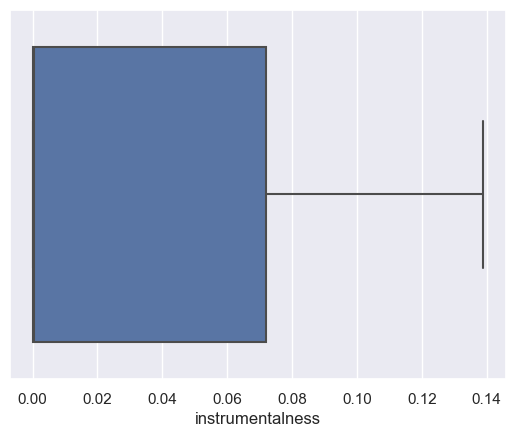

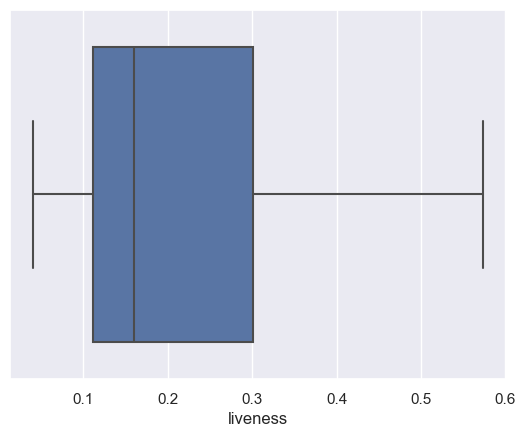

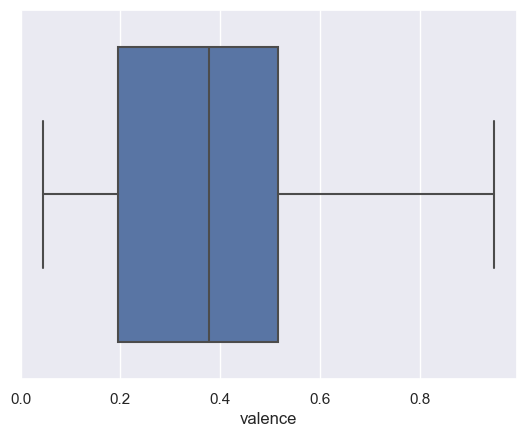

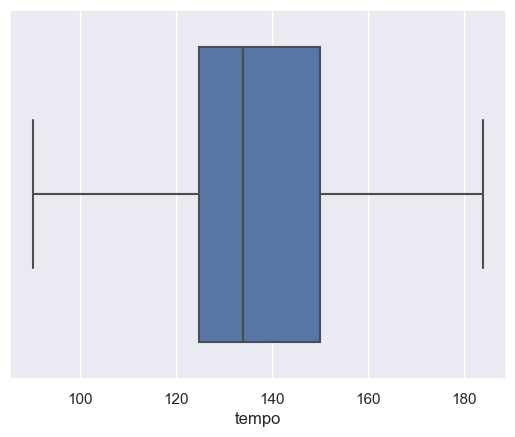

In [42]:
for feature in af:
    sns.boxplot(showfliers = False, x=xy[feature])
    plt.show()

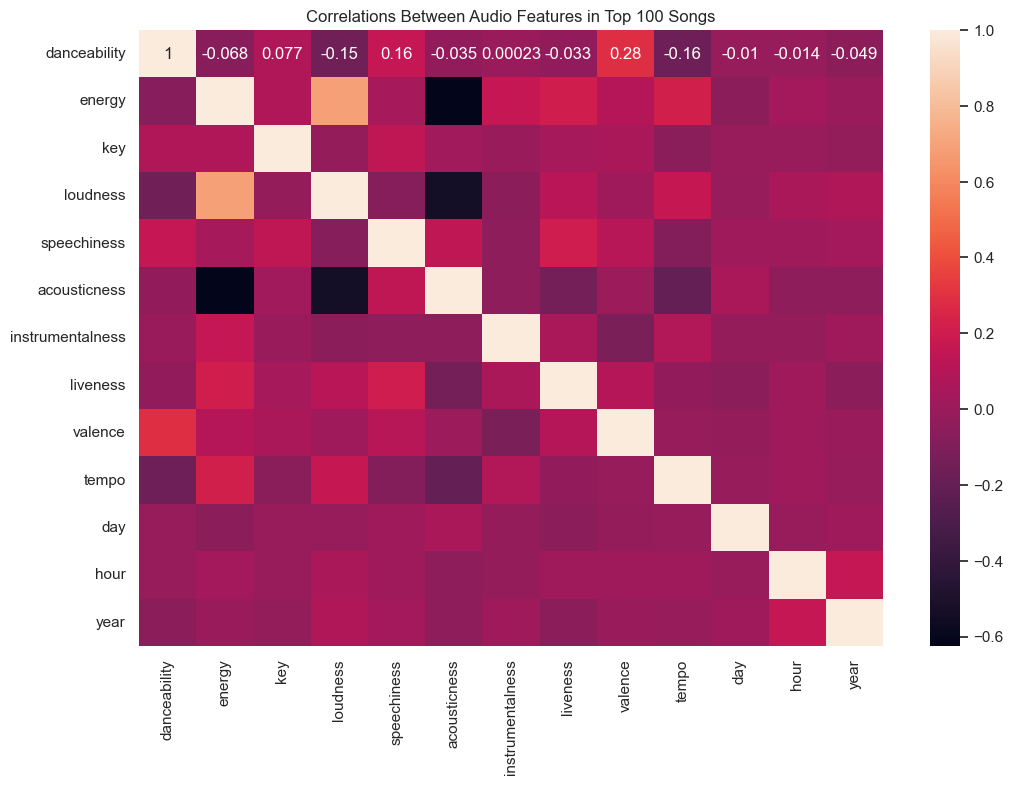

In [46]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True).set(title='Correlations Between Audio Features in Top 100 Songs')
plt.show()